# <font color=#025dfa> 2 Farklı Yolla Film Öneri Sistemi ve Derin Öğrenme -  Movie Recommendation System and Deep Learning in 2 Different Ways

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, film öneri sistemlerini iki farklı yöntemle geliştirmeyi amaçlamaktadır: popülerlik tabanlı öneriler ve K-en yakın komşular algoritması. Ayrıca, derin öğrenme teknikleri ile bu yaklaşımlar birleştirilerek, kullanıcılara daha kişiselleştirilmiş ve hassas film önerileri sunulacaktır. Proje, hem geleneksel hem de modern öneri algoritmalarının entegrasyonunu sağlayarak, film öneri sistemlerinin doğruluğunu ve kullanıcı memnuniyetini artırmayı hedeflemektedir. Bu yöntemler, hem kullanıcı tercihlerini hem de film popülerliğini dikkate alarak, daha etkili ve kapsamlı bir öneri deneyimi sunacaktır.

EN = This project aims to improve movie recommendation systems with two different methods: popularity-based recommendations and K-nearest neighbors algorithm. In addition, by combining these approaches with deep learning techniques, more personalized and precise movie recommendations will be provided to users. The project aims to increase the accuracy and user satisfaction of movie recommendation systems by integrating both traditional and modern recommendation algorithms. These methods will provide a more effective and comprehensive recommendation experience by tak

Kaynak/Source = https://thecleverprogrammer.com/2020/05/20/data-science-project-movie-recommendation-system/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import json
from scipy import spatial
import re
import warnings
warnings.filterwarnings('ignore')

from scipy import spatial #harital üzerindeki mesafeyi ölçüyor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_columns",None)
# TR = En fazla kaç sütun olduğunu gösteriyor.
# EN = It shows the maximum number of columns.

In [3]:
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
movies['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [7]:
def clean_genres(genre_str):
    # TR = Süslü parantezler, id, iki nokta üst üste, tırnak işaretleri ve sayıları kaldıran regex.
    # EN = Regex to remove curly braces, id, colons, quotation marks, and numbers.

    cleaned_str = re.sub(r'\{"id": \d+, "name": "', '', genre_str)
    cleaned_str = re.sub(r'"\}', '', cleaned_str)
    cleaned_str = re.sub(r'"\], \[', ', ', cleaned_str)
    cleaned_str = re.sub(r'\["|"\]', '', cleaned_str)

    return cleaned_str

# Genres sütununu temizle
movies['genres'] = movies['genres'].apply(clean_genres)

In [8]:
movies['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [9]:
credits.iloc[195]

movie_id                                               181533
title                 Night at the Museum: Secret of the Tomb
cast        [{"cast_id": 1, "character": "Larry Daley", "c...
crew        [{"credit_id": "537d3640c3a368059200002c", "de...
Name: 195, dtype: object

In [10]:
movies.iloc[241]

budget                                                          135000000
genres                               [Fantasy, Action, Adventure, Comedy]
homepage                   http://www.teenagemutantninjaturtlesmovie.com/
id                                                                 308531
keywords                [{"id": 380, "name": "brother brother relation...
original_language                                                      en
original_title           Teenage Mutant Ninja Turtles: Out of the Shadows
overview                After supervillain Shredder escapes custody, h...
popularity                                                      39.873791
production_companies    [{"name": "Paramount Pictures", "id": 4}, {"na...
production_countries    [{"iso_3166_1": "CN", "name": "China"}, {"iso_...
release_date                                                   2016-06-01
revenue                                                         245623848
runtime                               

In [11]:
df=pd.merge(movies, credits)
# TR = movies ve credits veri setlerini birleştiriyoruz. Varsayılan olarak ortak kolon olan 'movie_id' üzerinden birleştirme yapar.
# EN = We are merging the movies and credits datasets. By default, it merges on the common column 'movie_id'.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [13]:
df.title.value_counts()

title
The Host                 4
Batman                   4
Out of the Blue          4
Avatar                   1
The Girl on the Train    1
                        ..
Step Up 3D               1
Secondhand Lions         1
The Age of Adaline       1
Drag Me to Hell          1
My Date with Drew        1
Name: count, Length: 4800, dtype: int64

In [14]:
df.movie_id.nunique()

4803

In [15]:
df['tagline'].fillna(0, inplace=True)

In [16]:
df=df.drop(['homepage'],axis=1)
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 0 to 4808
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4805 non-null   int64  
 1   genres                4805 non-null   object 
 2   id                    4805 non-null   int64  
 3   keywords              4805 non-null   object 
 4   original_language     4805 non-null   object 
 5   original_title        4805 non-null   object 
 6   overview              4805 non-null   object 
 7   popularity            4805 non-null   float64
 8   production_companies  4805 non-null   object 
 9   production_countries  4805 non-null   object 
 10  release_date          4805 non-null   object 
 11  revenue               4805 non-null   int64  
 12  runtime               4805 non-null   float64
 13  spoken_languages      4805 non-null   object 
 14  status                4805 non-null   object 
 15  tagline               4805

In [17]:
df.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


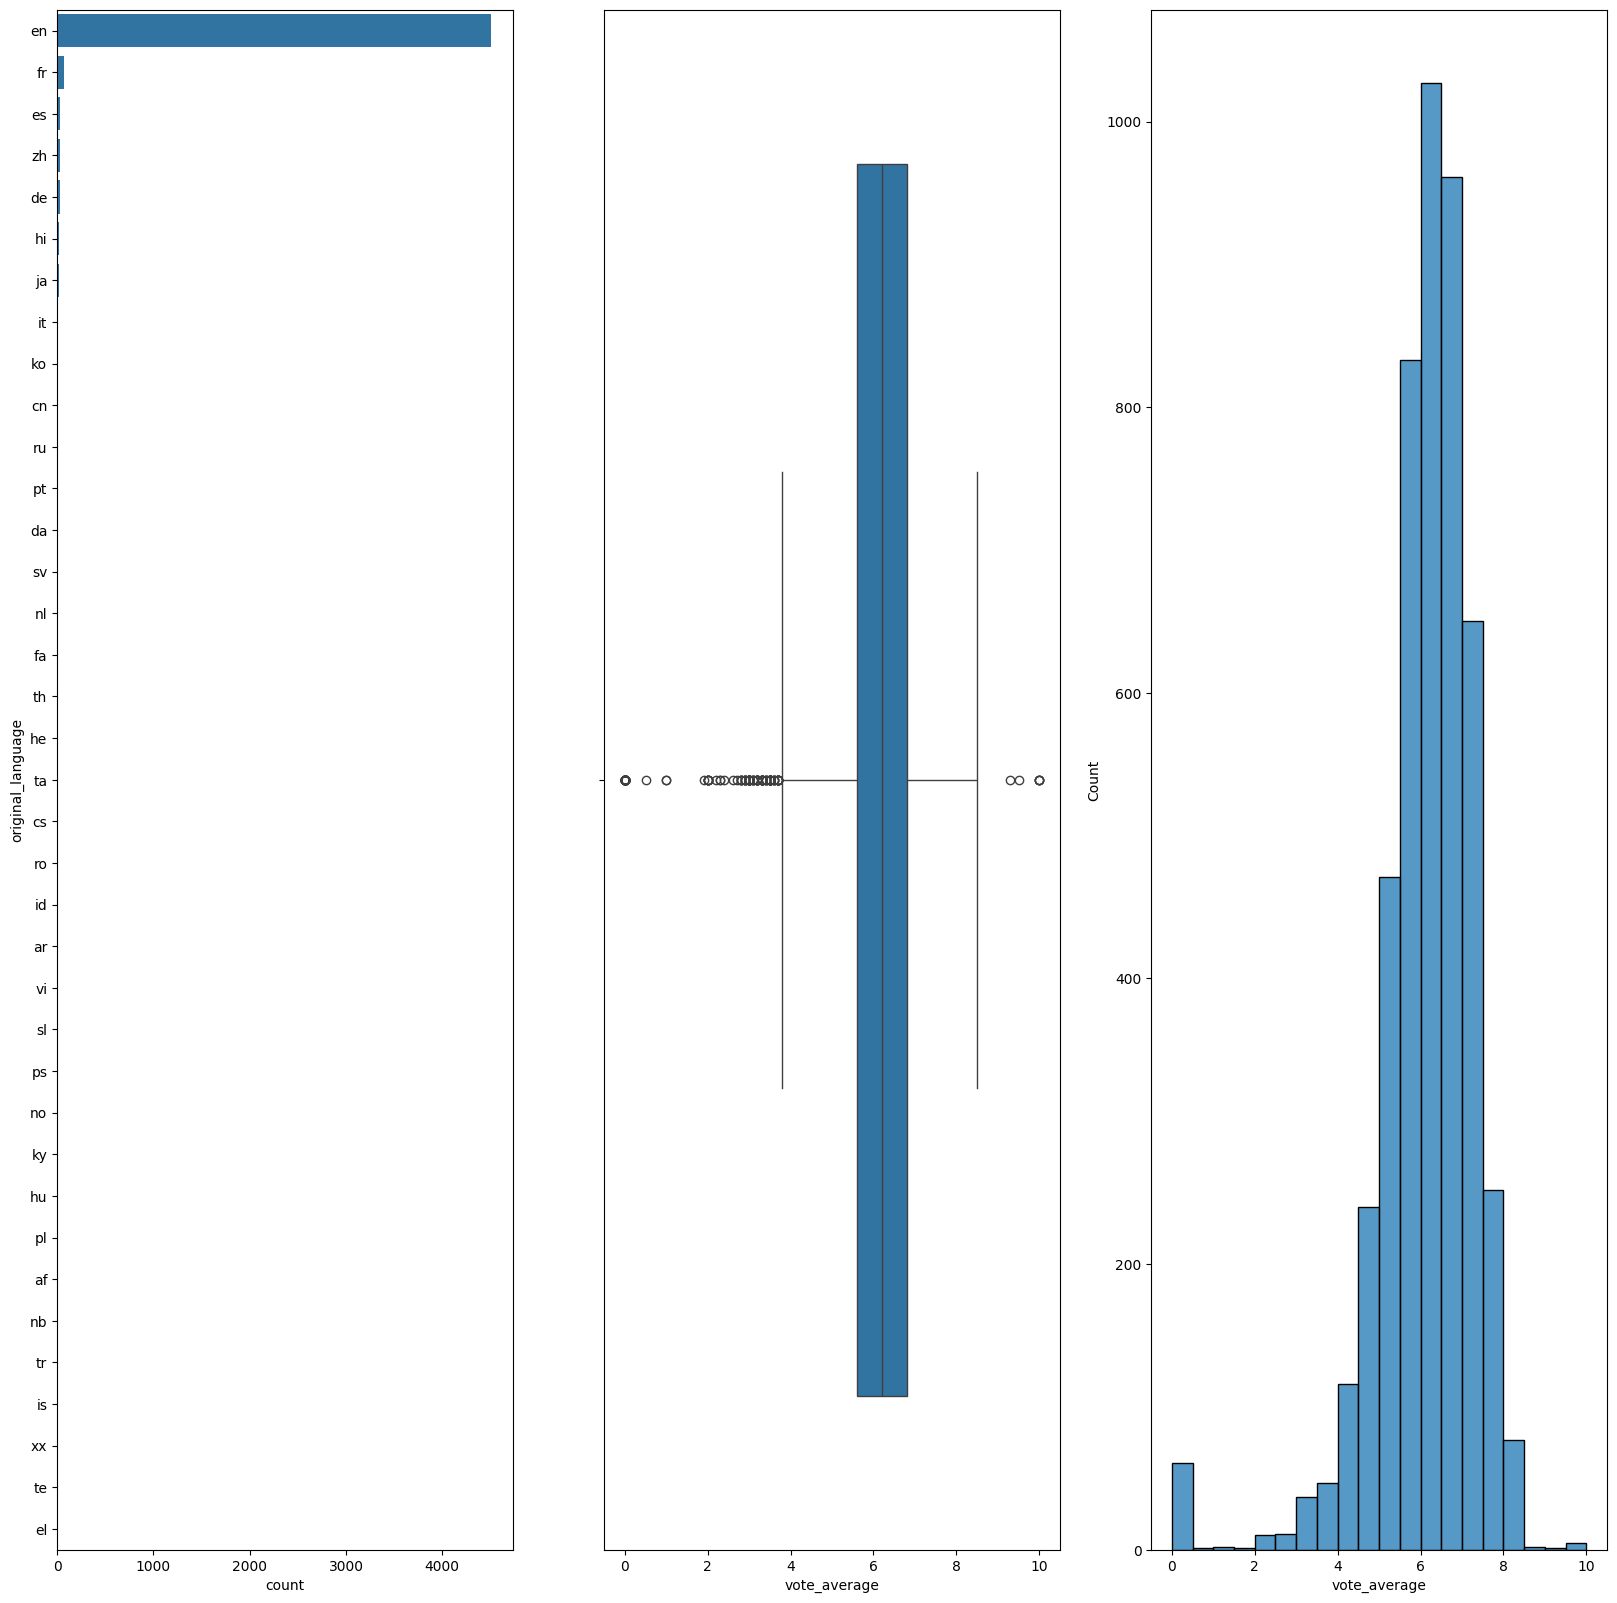

In [18]:
fig, ax2=plt.subplots(1,3,figsize=(20,20))
# TR = Subplot çoklu tablo oluşturuyor. a yerine kaç tane satır ve sütün olması gerektiğini yazacağız.
# EN = Subplot creates multiple tables. Instead of a, we will write how many rows and columns there should be


sns.countplot(y='original_language', data=df, order=df['original_language'].value_counts().index,ax=ax2[0])
sns.boxplot(x='vote_average', data=df,ax=ax2[1])
sns.histplot(x='vote_average', data=df, bins=20,ax=ax2[2]);
# TR = ax2 sonrası ([x][y]) yazı [x] ekseninde kaçıncı sırada,[y] ekseninde kaçıncı sırada olacağını belirtiyor.
# EN = The text after ax2 ([x][y]) indicates the rank on the [x] axis and the rank on the [y] axis.

In [19]:
df=df.head(2000)

## <font color=#FFD700> Popülerliğe Dayalı - Popularity Based

In [20]:
movie_grouped = df.groupby('title').agg({'vote_average': [np.size, np.sum, np.mean]})
# TR = df veri setini 'title' sütununa göre gruplayıp, her film için 'vote_average' sütununda 3 farklı istatistiği hesaplıyoruz:
#     np.size ile kaç değerlendirme yapıldığını (sayısı),
#     np.sum ile toplam değerlendirme puanını,
#     np.mean ile ortalama değerlendirme puanını hesaplıyoruz.

# EN = We are grouping the df dataset by the 'title' column, and calculating 3 different statistics for the 'credit' column:
#     np.size to get the number of vote_average (count),
#     np.sum to get the total credit score,
#     np.mean to get the average credit score.


In [21]:
movie_grouped

vote_average          
                                                  size  sum mean
title                                                           
102 Dalmatians                                       1  5.1  5.1
13 Going on 30                                       1  6.3  6.3
13 Hours: The Secret Soldiers of Benghazi            1  7.0  7.0
15 Minutes                                           1  5.7  5.7
16 Blocks                                            1  6.2  6.2
...                                                ...  ...  ...
Zoolander 2                                          1  4.7  4.7
Zoom                                                 1  4.9  4.9
xXx                                                  1  5.8  5.8
xXx: State of the Union                              1  4.7  4.7
Æon Flux                                             1  5.4  5.4

[1994 rows x 3 columns]

In [22]:
populer_movies = movie_grouped.sort_values(('vote_average', 'mean'), ascending=False)
# TR = movie_grouped veri setini 'vote_average' sütununun 'mean' (ortalama) değerine göre azalan sırayla sıralıyoruz.
#     Bu, en yüksek ortalama puana sahip filmleri en üste getirir.

# EN = We are sorting the movie_grouped dataset by the 'mean' (average) value of the 'vote_average' column in descending order.
#     This brings the movies with the highest average credits to the top.


In [23]:
populer_movies.head()

vote_average          
                                 size  sum mean
title                                          
The Shawshank Redemption            1  8.5  8.5
Fight Club                          1  8.3  8.3
Schindler's List                    1  8.3  8.3
Howl's Moving Castle                1  8.2  8.2
The Green Mile                      1  8.2  8.2

In [24]:
grouped_sum = movie_grouped['vote_average']['sum'].sum()
# TR = movie_grouped veri setindeki 'vote_average' sütununun 'sum' (toplam) değerlerini topluyoruz.
#     Bu, tüm filmler için toplam değerlendirme puanlarını toplar.

# EN = We are summing the 'sum' values from the 'vote_average' column in the movie_grouped dataset.
#     This gives the total credit score across all movies.

In [25]:
populer_movies['percentage'] = movie_grouped['vote_average']['sum'].div(grouped_sum) * 100
# TR = movie_grouped veri setindeki her bir filmin 'vote_average' sütunundaki 'sum' (toplam) değerini, grouped_sum (tüm filmlerin toplam değerlendirme puanı) ile bölüyoruz.
#     Sonucu 100 ile çarparak, her filmin toplam değerlendirme puanının tüm filmler arasındaki yüzdesini hesaplıyoruz.

# EN = We are dividing the 'sum' (total) value from the 'vote_average' column in the movie_grouped dataset by grouped_sum (the total credit score for all movies).
#     We multiply the result by 100 to calculate the percentage of each movie's total credit score relative to the total across all movies.


In [26]:
populer_movies.head()

vote_average           percentage
                                 size  sum mean           
title                                                     
The Shawshank Redemption            1  8.5  8.5   0.068721
Fight Club                          1  8.3  8.3   0.067104
Schindler's List                    1  8.3  8.3   0.067104
Howl's Moving Castle                1  8.2  8.2   0.066295
The Green Mile                      1  8.2  8.2   0.066295

In [27]:
populer_movies = populer_movies.sort_values('percentage', ascending=False)
# TR = populer_movies veri setini 'percentage' sütununa göre azalan sırayla sıralıyoruz.
#     Bu, en yüksek yüzdelik değere sahip filmleri en üste getirir.
# EN = We are sorting the populer_movies dataset by the 'percentage' column in descending order.
#     This brings the movies with the highest percentage values to the top.

In [28]:
populer_movies

vote_average             percentage
                                 size   sum  mean           
title                                                       
Batman                              4  26.2  6.55   0.211822
The Host                            4  25.4  6.35   0.205354
The Shawshank Redemption            1   8.5  8.50   0.068721
Schindler's List                    1   8.3  8.30   0.067104
Fight Club                          1   8.3  8.30   0.067104
...                               ...   ...   ...        ...
United Passions                     1   3.0  3.00   0.024254
Battlefield Earth                   1   3.0  3.00   0.024254
Dragonball Evolution                1   2.9  2.90   0.023446
Foodfight!                          1   2.3  2.30   0.018595
Black Water Transit                 1   0.0  0.00   0.000000

[1994 rows x 4 columns]

In [29]:
populer_movies['Rank'] = populer_movies['percentage'].rank(ascending=False)
# TR = populer_movies veri setindeki 'percentage' sütununa göre her filme bir sıralama (rank) numarası veriyoruz.
#     Bu sıralama, yüzdelik değerlere göre azalan sırayla yapılır, yani en yüksek yüzdelik değere sahip film birinci sıradadır.

# EN = We are assigning a rank to each movie in the populer_movies dataset based on the 'percentage' column.
#     The ranking is done in descending order, meaning the movie with the highest percentage gets the top rank.

In [30]:
populer_movies.head()

vote_average             percentage Rank
                                 size   sum  mean                
title                                                            
Batman                              4  26.2  6.55   0.211822  1.0
The Host                            4  25.4  6.35   0.205354  2.0
The Shawshank Redemption            1   8.5  8.50   0.068721  3.0
Schindler's List                    1   8.3  8.30   0.067104  4.5
Fight Club                          1   8.3  8.30   0.067104  4.5

## <font color=#1cfc03> K_En Yakın Komşular - KNN - K_Nearrest Neighboors

In [31]:
movie_properties = df.groupby('movie_id').agg({'vote_average': [np.size, np.mean]})
# TR = df veri setini 'movie_id' sütununa göre gruplayıp, her film için 'vote_average' sütununda iki istatistiği hesaplıyoruz:
#     np.size ile her film için kaç değerlendirme yapıldığını (sayısı) ve
#     np.mean ile her film için ortalama değerlendirme puanını hesaplıyoruz.
# EN = We are grouping the df dataset by the 'movie_id' column and calculating two statistics for the 'vote_average' column for each movie:
#     np.size to get the number of credits per movie (count), and
#     np.mean to get the average vote_average per movie.

In [32]:
movie_properties

vote_average     
                 size mean
movie_id                  
12                  1  7.6
13                  1  8.2
18                  1  7.3
22                  1  7.5
24                  1  7.7
...               ...  ...
347969              1  4.9
365222              1  6.5
367961              1  6.4
381902              1  6.0
417859              1  6.4

[1996 rows x 2 columns]

In [33]:
movie_dict = {}
for _, row in df.iterrows():
    Product_ID = int(row['movie_id'])
    # TR = Ürün ID'sini alıyoruz.
    # EN = We are extracting the product ID.

    name = row['title']
    # TR = Ürün ismini alıyoruz.
    # EN = We are extracting the product name.

    genres = [row['genres']]
    # TR = Ürünün kategorisini alıyoruz.
    # EN = We are extracting the category of the product.

    movie_dict[Product_ID] = (name, genres, row['vote_average'])
    # TR = Ürün ID'sine karşılık gelen ürün bilgilerini dictionary'ye ekliyoruz:
    #     (ürün adı, kategori, değerlendirme puanı, beden)
    # EN = Adding product information to the dictionary for Product ID:
    #     (product name, category, rating, size)


In [34]:
genres

['[Horror]']

In [35]:
movie_dict

{19995: ('Avatar', ['[Action, Adventure, Fantasy, Science Fiction]'], 7.2),
 285: ("Pirates of the Caribbean: At World's End",
  ['[Adventure, Fantasy, Action]'],
  6.9),
 206647: ('Spectre', ['[Action, Adventure, Crime]'], 6.3),
 49026: ('The Dark Knight Rises', ['[Action, Crime, Drama, Thriller]'], 7.6),
 49529: ('John Carter', ['[Action, Adventure, Science Fiction]'], 6.1),
 559: ('Spider-Man 3', ['[Fantasy, Action, Adventure]'], 5.9),
 38757: ('Tangled', ['[Animation, Family]'], 7.4),
 99861: ('Avengers: Age of Ultron',
  ['[Action, Adventure, Science Fiction]'],
  7.3),
 767: ('Harry Potter and the Half-Blood Prince',
  ['[Adventure, Fantasy, Family]'],
  7.4),
 209112: ('Batman v Superman: Dawn of Justice',
  ['[Action, Adventure, Fantasy]'],
  5.7),
 1452: ('Superman Returns',
  ['[Adventure, Fantasy, Action, Science Fiction]'],
  5.4),
 10764: ('Quantum of Solace', ['[Adventure, Action, Thriller, Crime]'], 6.1),
 58: ("Pirates of the Caribbean: Dead Man's Chest",
  ['[Adventure

In [36]:
movies['genres'].unique()

array(['[Action, Adventure, Fantasy, Science Fiction]',
       '[Adventure, Fantasy, Action]', '[Action, Adventure, Crime]', ...,
       '[Thriller, Horror, Comedy]', '[Foreign, Thriller]',
       '[Comedy, Drama, Romance, TV Movie]'], dtype=object)

In [37]:
genres_list = ['Action','History','Animation', 'Adventure','Family', 'Fantasy','Western','Music','War','History','Mystery', 'Science Fiction', 'Crime',
               'Thriller', 'Horror', 'Comedy', 'Drama', 'Romance', 'TV Movie', 'Foreign','Documentary']
genre_vector_size = len(genres_list)
# TR = Türler için bir vektör tanımlıyoruz, her tür bir binary vektör ile temsil edilir.
# EN = Defining a vector for genres, each genre is represented by a binary vector.


genre_to_vector = {
# TR = genre_to_vector dictionary'si her bir türe karşılık gelen binary vektörü içerir.
# EN = genre_to_vector dictionary contains the binary vector corresponding to each genre.
    genre: [1 if i == idx else 0 for i in range(len(genres_list))]
    for idx, genre in enumerate(genres_list)

}

In [38]:
def compute_distance(a, b):
    # TR = a ve b'nin türlerini vektörlere çeviriyoruz.
    # EN = We convert the genres of a and b to vectors.

    a_genre_list = a[1][0].split(', ')
    b_genre_list = b[1][0].split(', ')

    a_genre_vector = np.mean([genre_to_vector.get(genre, np.zeros(genre_vector_size)) for genre in a_genre_list], axis=0)
    b_genre_vector = np.mean([genre_to_vector.get(genre, np.zeros(genre_vector_size)) for genre in b_genre_list], axis=0)
    # TR = a ve b filmleri arasındaki kosinüs mesafesini hesaplıyoruz.
    # EN = We calculate the cosine distance between the genre vectors of movies a and b.

    genre_distance = spatial.distance.cosine(a_genre_vector, b_genre_vector)
    # TR = a ve b filmlerinin türleri arasındaki kosinüs mesafesini hesaplarız.
    #     a'nın ve b'nin tür vektörleri arasındaki kosinüs mesafesini kullanarak türler arasındaki benzerliği ölçeriz.
    # EN = We calculate the cosine distance between the genre vectors of movies a and b.
    #     This measures the similarity between the genre vectors of the two movies.

    popularity_distance = abs(a[2] - b[2])
    # TR = a ve b filmlerinin popülerlik (değerlendirme sayısı) arasındaki mutlak farkı hesaplarız.
    #     Bu, filmler arasındaki popülerlik farkını ölçer.
    # EN = We calculate the absolute difference in popularity (number of credits) between movies a and b.
    #     This measures the difference in popularity between the two movies.

    return genre_distance + popularity_distance
    # TR = Türler arasındaki mesafe ve popülerlik arasındaki farkı toplarız.
    # EN = We sum the genre distance and the popularity distance.

In [39]:
print(list(movie_dict.keys()))

[19995, 285, 206647, 49026, 49529, 559, 38757, 99861, 767, 209112, 1452, 10764, 58, 57201, 49521, 2454, 24428, 1865, 41154, 122917, 1930, 20662, 57158, 2268, 254, 597, 271110, 44833, 135397, 37724, 558, 68721, 12155, 36668, 62211, 8373, 91314, 68728, 102382, 20526, 49013, 44912, 10193, 534, 168259, 72190, 127585, 54138, 81005, 64682, 9543, 68726, 38356, 217, 105864, 62177, 188927, 10681, 5174, 14161, 17979, 76757, 258489, 411, 246655, 155, 14160, 15512, 1726, 44826, 8487, 1735, 297761, 2698, 137113, 9804, 14869, 150540, 278927, 10138, 58595, 102651, 119450, 79698, 64686, 100402, 10192, 158852, 177572, 82690, 5255, 47933, 10191, 296, 118340, 157336, 27205, 315011, 49051, 9799, 4922, 49538, 131634, 27022, 503, 241259, 810, 68735, 87101, 10140, 676, 1858, 1966, 675, 674, 8960, 6479, 118, 2062, 272, 10527, 18360, 2080, 605, 109445, 604, 76338, 76341, 13448, 10195, 13053, 19585, 57165, 62213, 177677, 7978, 5559, 49444, 10196, 956, 117251, 50321, 11619, 266647, 82703, 652, 80321, 36669, 4307

In [40]:
movie_dict[285]

("Pirates of the Caribbean: At World's End",
 ['[Adventure, Fantasy, Action]'],
 6.9)

In [41]:
movie_dict[602]

('Independence Day', ['[Action, Adventure, Science Fiction]'], 6.7)

In [42]:
compute_distance(movie_dict[285], movie_dict[602])
# TR = movie_dict sözlüğündeki ID'si 2 olan film ile ID'si 4 olan film arasındaki mesafeyi hesaplıyoruz.
#     Bu, iki film arasındaki türler ve popülerlik açısından mesafeyi belirler.
# EN = We are calculating the distance between the movie with ID 2 and the movie with ID 4 from the movie_dict dictionary.
#     This measures the distance between the two movies in terms of genre and popularity.


1.2000000000000002

In [43]:
mesafeler = []
for movie1 in movie_dict:
    for movie2 in movie_dict:
        mesafeler.append(compute_distance(movie_dict[movie1], movie_dict[movie2]))
        # TR = movie_dict içindeki her iki film (movie1 ve movie2) için mesafeyi hesaplıyoruz.
        #     compute_distance fonksiyonunu kullanarak film1 ve film2 arasındaki mesafeyi buluyoruz.
        #     Hesaplanan mesafeyi mesafeler listesine ekliyoruz.
        # EN = For every pair of movies (movie1 and movie2) in movie_dict, we calculate the distance between them.
        #     We use the compute_distance function to find the distance between movie1 and movie2.
        #     The calculated distance is then appended to the mesafeler list.


In [44]:
mesafeler

[0.0,
 0.5928932188134522,
 1.192893218813453,
 1.3999999999999995,
 1.392893218813453,
 2.3,
 0.20000000000000018,
 0.39289321881345207,
 0.4928932188134526,
 1.7928932188134525,
 2.3,
 2.1000000000000005,
 0.4928932188134526,
 1.5928932188134524,
 0.7000000000000002,
 1.9000000000000004,
 1.2000000000000002,
 1.7999999999999998,
 2.0,
 0.39289321881345296,
 0.9928932188134526,
 1.0,
 0.39999999999999947,
 1.4000000000000004,
 1.6000000000000005,
 1.2999999999999998,
 1.1000000000000005,
 2.2,
 1.2000000000000002,
 0.5928932188134522,
 0.7928932188134524,
 0.6928932188134528,
 1.0928932188134524,
 1.9000000000000004,
 0.20000000000000018,
 2.2,
 2.4000000000000004,
 1.7928932188134525,
 0.9928932188134526,
 1.9000000000000004,
 1.9000000000000004,
 3.1000000000000005,
 1.3999999999999995,
 2.3,
 0.09999999999999964,
 1.5,
 0.2999999999999998,
 0.4928932188134526,
 2.7,
 0.09999999999999964,
 1.5,
 1.5,
 2.1000000000000005,
 1.5,
 1.6000000000000005,
 1.1464466094067263,
 0.89289321881

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling

In [45]:
x=df.drop(['vote_average','budget','keywords','overview','production_companies','production_countries','spoken_languages','release_date'],axis=1)
y=df[['vote_average']]

In [46]:
x=pd.get_dummies(x,drop_first=True)
# Tr =  kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi için kullanılır.
# En = It is used to convert categorical variables into numerical variables.

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# TR = Veriyi eğitim ve test seti olarak ayırır; %20 test seti, %80 eğitim seti olacak şekilde bölünür
# EN = Splits the data into training and test sets; 20% for the test set and 80% for the training set

In [48]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
# TR = Modeli ortalama kare hata (mse) kaybı ile derliyoruz.
# EN = We compile the model with mean square error (mse) loss.

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# TR = EarlyStopping ekleyin: Eğitim sırasında model performansı iyileşmediğinde erken durması için kullanıyoruz.
# EN = Add EarlyStopping: We use it to stop early when model performance does not improve during training.

# TR = val_loss 10 epoch boyunca iyileşmezse eğitimi durduruyor ve en iyi ağırlıkları geri yüklüyor.
# EN = If val_loss does not improve for 10 epochs, it stops training and restores the best weights.

history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100, callbacks=[early_stopping])
# TR = Modeli 100 epoch boyunca eğitiyoruz, fakat EarlyStopping ile durdurulabilir. Batch boyutu 128 olarak belirlenmiş.
# EN = We train the model for 100 epochs, but it can be stopped with EarlyStopping. Batch size is set to 128.

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 6502339837952.0000 - val_loss: 255888326656.0000
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 1793526202368.0000 - val_loss: 91007057920.0000
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 867935059968.0000 - val_loss: 122868695040.0000
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 385245446144.0000 - val_loss: 212572438528.0000
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 243205505024.0000 - val_loss: 4660438016.0000
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 243928694784.0000 - val_loss: 17468772352.0000
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 153115115520.0000 - val_loss: 492390272.0000
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 128134135808.0000 - val_loss: 60550283264.0000
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 108614041600.0000 - val_loss: 223105552.0000
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       5,419,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,750,085 (63.90 MB)

 Trainable params: 5,583,361 (21.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,166,724 (42.60 MB)

In [50]:
test_loss = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test kaybı: {test_loss:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 427935.0938 
Test kaybı: 370831.5625


In [51]:
pred = model.predict(x_test)
# TR = modeli x_test_scaled ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik.
# EN = We predicted the model with x_test_scaled and the predict feature. predict=means prediction. We guessed and equalized the pred

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [52]:
r2_score(y_test, pred)
# TR = Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır ve arasındaki farkı bul.
# EN = Compare this with the actual (y_test) value and the predicted (pred) values ​​and find the difference between them.

-521276.79970283015

In [53]:
mean_squared_error(y_test,pred)**.5
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

608.9593752557176

In [54]:
mean_absolute_error(y_test,pred)
# TR = mean_absolute_error ile (y_test,pred) kullanarak değerini hesaplama.
# EN = Calculating the value of mean_absolute_error using (y_test,pred).

357.2986307308357

In [55]:
residuals=y_test-pred

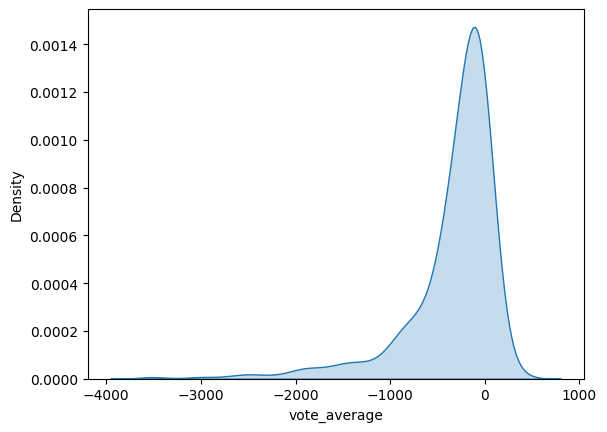

In [56]:
sns.kdeplot(x=residuals['vote_average'],fill=True);

In [57]:
loss_f=pd.DataFrame(history.history)

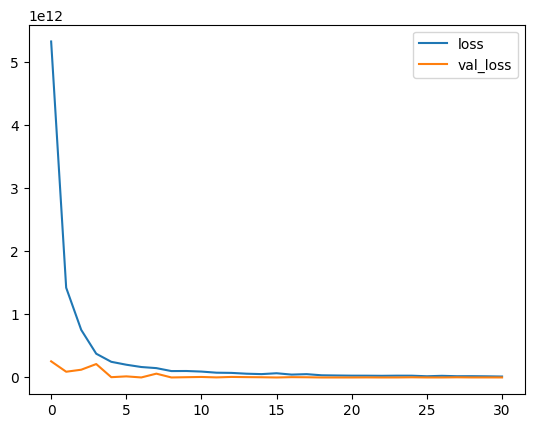

In [58]:
loss_f.plot();

TR = R2_score ekşili değer aldığı için automl aynı sonuç verecek mi diye baktım.

EN = Since R2_score has a certain value, I checked whether automl would give the same result.

In [59]:
#pip install pycaret

In [60]:
#from pycaret.regression import*

In [61]:
#setup(df,target='vote_average')

In [62]:
#best_model=compare_models()